## A) Presentacion

Caso: Credit score classification <BR><br> Integrantes: Solórzano Ortega, Dáriel Josias

## B) Descripcion del Caso

Problema:
Está trabajando como científico de datos en una compañía financiera global. A lo largo de los años, la empresa ha recopilado datos bancarios básicos y mucha información relacionada con el crédito. La gerencia quiere construir un sistema inteligente para segregar a las personas en tramos de puntaje de crédito para reducir los esfuerzos manuales.<br><br>
Objetivo:
Dada la información relacionada con el crédito de una persona, cree un modelo de aprendizaje automático que pueda clasificar el puntaje crediticio.

## C) Desarrollo


In [ ]:
#!pip install missingpy

IMPORTACION DE PAQUETES

In [74]:
# Import necessary libs

import pandas as pd
import numpy as np

# complementos
import warnings
import sys
warnings.filterwarnings('ignore')
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesar label
from sklearn import preprocessing

# Modelamiento
from sklearn.model_selection import train_test_split

# Desplegar todas las filas
pd.set_option('display.max_rows', None) 

from google.colab import drive
drive.mount('/content/drive')

# Crea una semilla cualesquiera
seed = 16
np.random.seed(seed)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LECTURA DE DATA

In [75]:
df_train = pd.read_csv(r"/content/drive/MyDrive/DMC/ProyectoMachineLearning/Score Crediticio/train.csv", low_memory=False)
df_test = pd.read_csv(r"/content/drive/MyDrive/DMC/ProyectoMachineLearning/Score Crediticio/test.csv", low_memory=False)

# Exploracion de la Data

In [ ]:
df_train.shape, df_test.shape

((100000, 28), (50000, 27))

OBS: Tenemos una columna adicional en nuestra data de entrenamiento

In [ ]:
df_train.columns, df_test.columns

(Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
        'Credit_Utilization_Ratio', 'Credit_History_Age',
        'Payment_of_Min_Amount', 'Total_EMI_per_month',
        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
        'Credit_Score'],
       dtype='object'),
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
        'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
        'Credit_Utilization_

In [ ]:
df_train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

OBS: Identificamos que la columna adicional es 'Credit Score', la cual es nuestro target deseado, por este motivo se consideraria aplicar un modelo Supervisado

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Obs: Tenemos distintos tipos de columnas dtypes: float64(4), int64(4), object(20)

In [ ]:
# Descripcion
print("Número de observaciones = {}".format(df_train.shape[0]))
print("Total de variables disponibles = {}".format(df_train.columns.shape[0]))
print("Columnas que cuentan con algún valor nulo:")
print(df_train.isnull().sum())


Número de observaciones = 100000
Total de variables disponibles = 28
Columnas que cuentan con algún valor nulo:
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Mont

Obs: Verificamos que contamos con columnas con valores vacios <br>
Name                         9985 <br>
Monthly_Inhand_Salary       15002 <br>
Type_of_Loan                11408 <br>
Num_of_Delayed_Payment       7002 <br>
Num_Credit_Inquiries         1965 <br>
Credit_History_Age           9030 <br>
Amount_invested_monthly      4479 <br>
Monthly_Balance              1200 <br>

In [ ]:
df_train.duplicated().sum()

0

Obs: Verificamos que no contamos con filas duplicadas

In [ ]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Variables Cuantitativas

In [ ]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [76]:
df_train.drop(['ID','Customer_ID','Month','Name','SSN','Type_of_Loan'], axis=1, inplace=True)
df_test.drop(['ID','Customer_ID','Month','Name','SSN','Type_of_Loan'], axis=1, inplace=True)

Obs: <br>
ID, Customer_ID, Name, SSN, Type_of_Loan, Month (Tenemos comportamiento de pago): NO APORTA. BORRAR <br><br>

Corregir Data

In [77]:
def corregir_data(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

def corregir_delayed_payments(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    else:
        return str(value)

def corregir_amount_invested_monthly(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    else:
        return str(value)

def corregir_changed_credit_limit(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif str(value) == '_':
        return str(value).replace("_", str(np.nan))
    else:
        return str(value)

In [ ]:
'''  	
Age: 					          contiene valores con - & _ 		            INT     LISTO
Num_of_Loan: 			      contiene valores con - & _ 		            INT     LISTO

Num_of_Delayed_Payment: contiene valores con - , _ & -2_  	      INT     LISTO

Annual_Income: 			    contiene _ 						                    FLOAT 	LISTO
Outstanding_Debt:		    contiene _ 						                    FLOAT 	LISTO

Changed_Credit_Limit: 	contiene _ (solo) & -			                FLOAT 	LISTO

Credit_History_Age		                                            INT     LISTO en meses
Amount_invested_monthly	contiene __10000__ (solo)  			          FLOAT 	LISTO
Monthly_Balance			    contiene __-333333333333333333333333333__ BORRAR  LISTO 9

Monthly_Inhand_Salary: 	  contiene valores vacios     LISTO
Num_Bank_Accounts: 			  contiene valores negativos
Num_Credit_Card: 			    OK
Interest_Rate: 	          OK
Delay_from_due_date: 			contiene valores negativos
Num_Credit_Inquiries: 		contiene valores vacios     LISTO
Credit_Utilization_Ratio: OK 
Total_EMI_per_month: 			OK 
'''  	

In [78]:
for i in ['Age','Num_of_Loan']:
    df_train[i] = df_train[i].apply(corregir_data)
    df_train[i] = df_train[i].astype(np.int)
    print(i + " Corregido!")

for i in ['Age','Num_of_Loan']:
    df_test[i] = df_test[i].apply(corregir_data)
    df_test[i] = df_test[i].astype(np.int)
    print(i + " Corregido!")

Age Corregido!
Num_of_Loan Corregido!
Age Corregido!
Num_of_Loan Corregido!


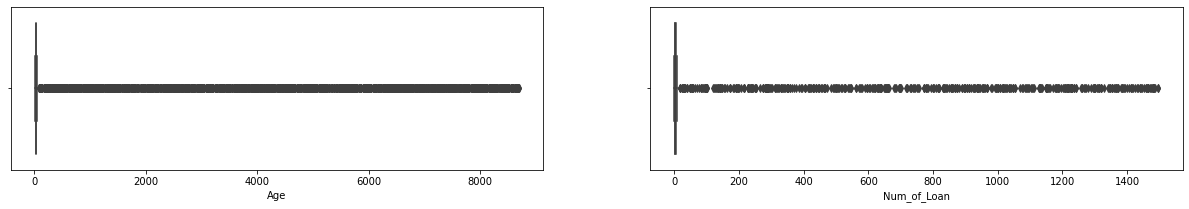

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 3))

sns.boxplot(ax=axes[0], data=df_train, x='Age')
sns.boxplot(ax=axes[1], data=df_train, x='Num_of_Loan')

In [79]:
for i in ['Annual_Income','Outstanding_Debt']:
    df_train[i] = df_train[i].apply(corregir_data)
    df_train[i] = df_train[i].astype(np.float64)
    print(i + " Corregido!")

for i in ['Annual_Income','Outstanding_Debt']:
    df_test[i] = df_test[i].apply(corregir_data)
    df_test[i] = df_test[i].astype(np.float64)
    print(i + " Corregido!")

Annual_Income Corregido!
Outstanding_Debt Corregido!
Annual_Income Corregido!
Outstanding_Debt Corregido!


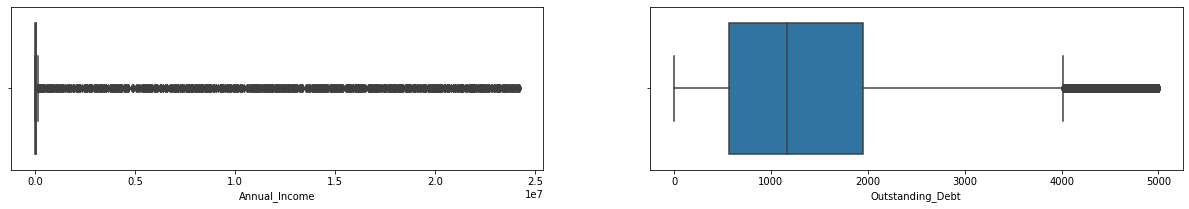

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 3))

sns.boxplot(ax=axes[0], data=df_train, x='Annual_Income')
sns.boxplot(ax=axes[1], data=df_train, x='Outstanding_Debt')

In [80]:
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(corregir_delayed_payments)
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(corregir_delayed_payments) #-2_
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].astype(np.float64)
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].fillna(df_train['Num_of_Delayed_Payment'].median()) # Reemplazando la mediana
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].astype(np.int64)

df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].apply(corregir_delayed_payments)
df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].apply(corregir_delayed_payments) #-2_
df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].astype(np.float64)
df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].fillna(df_test['Num_of_Delayed_Payment'].median()) # Reemplazando la mediana
df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].astype(np.int64)

In [81]:
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].apply(corregir_changed_credit_limit)
df_train["Changed_Credit_Limit"] = df_train["Changed_Credit_Limit"].astype(np.float64)
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].fillna(df_train['Changed_Credit_Limit'].median()) # Reemplazando la mediana

df_test['Changed_Credit_Limit'] = df_test['Changed_Credit_Limit'].apply(corregir_changed_credit_limit)
df_test["Changed_Credit_Limit"] = df_test["Changed_Credit_Limit"].astype(np.float64)
df_test['Changed_Credit_Limit'] = df_test['Changed_Credit_Limit'].fillna(df_test['Changed_Credit_Limit'].median()) # Reemplazando la mediana

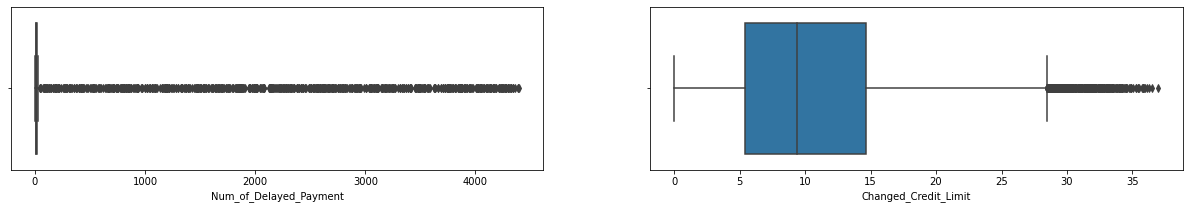

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 3))

sns.boxplot(ax=axes[0], data=df_train, x='Num_of_Delayed_Payment')
sns.boxplot(ax=axes[1], data=df_train, x='Changed_Credit_Limit')

In [82]:
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].fillna(df_train['Credit_History_Age'].mode()[0])
df_train[['Year','W1','W2','Month','W3']] = df_train['Credit_History_Age'].str.split(' ', expand=True)
df_train["Year"] = df_train["Year"].astype(np.int)
df_train["Month"] = df_train["Month"].astype(np.int)
df_train['Credit_History_Age'] = df_train['Year'] * 12 + df_train['Month']
df_train = df_train.drop(['Year','W1','W2','Month','W3'], axis=1)

df_test['Credit_History_Age'] = df_test['Credit_History_Age'].fillna(df_test['Credit_History_Age'].mode()[0])
df_test[['Year','W1','W2','Month','W3']] = df_test['Credit_History_Age'].str.split(' ', expand=True)
df_test["Year"] = df_test["Year"].astype(np.int)
df_test["Month"] = df_test["Month"].astype(np.int)
df_test['Credit_History_Age'] = df_test['Year'] * 12 + df_test['Month']
df_test = df_test.drop(['Year','W1','W2','Month','W3'], axis=1)

In [83]:
df_train["Amount_invested_monthly"] = df_train["Amount_invested_monthly"].apply(corregir_amount_invested_monthly)
df_train["Amount_invested_monthly"] = df_train["Amount_invested_monthly"].astype(np.float64)
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].fillna(df_train['Amount_invested_monthly'].median()) # Reemplazando la mediana

df_test["Amount_invested_monthly"] = df_test["Amount_invested_monthly"].apply(corregir_amount_invested_monthly)
df_test["Amount_invested_monthly"] = df_test["Amount_invested_monthly"].astype(np.float64)
df_test['Amount_invested_monthly'] = df_test['Amount_invested_monthly'].fillna(df_test['Amount_invested_monthly'].median()) # Reemplazando la mediana

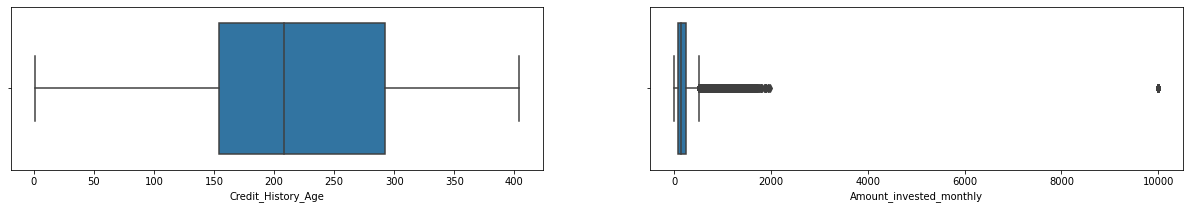

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 3))

sns.boxplot(ax=axes[0], data=df_train, x='Credit_History_Age')
sns.boxplot(ax=axes[1], data=df_train, x='Amount_invested_monthly')

In [84]:
df_train.drop(df_train[df_train["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
df_train["Monthly_Balance"] = df_train["Monthly_Balance"].astype(np.float64)
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].fillna(df_train['Monthly_Balance'].median()) # Reemplazando la mediana

df_test.drop(df_test[df_test["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
df_test["Monthly_Balance"] = df_test["Monthly_Balance"].astype(np.float64)
df_test['Monthly_Balance'] = df_test['Monthly_Balance'].fillna(df_test['Monthly_Balance'].median()) # Reemplazando la mediana

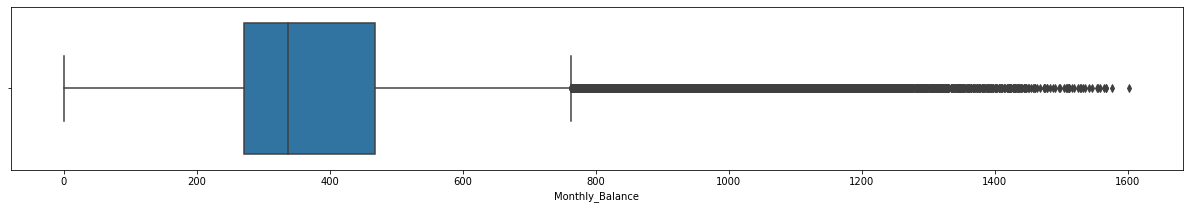

In [ ]:
# Grouped boxplot
plt.figure(figsize=(21,3))
sns.boxplot(x='Monthly_Balance', data=df_train);

Obs: Decidimos eliminarlos por que son datos atipicos y son solo 9 de nuestro total asi que se podria obtar por esa opcion. Ademas que son outliers muy dañinos

In [85]:
for i in ['Monthly_Inhand_Salary', 'Num_Credit_Inquiries']:
    df_train[i].fillna(df_train[i].median(), inplace=True)

for i in ['Monthly_Inhand_Salary', 'Num_Credit_Inquiries']:
    df_test[i].fillna(df_test[i].median(), inplace=True)

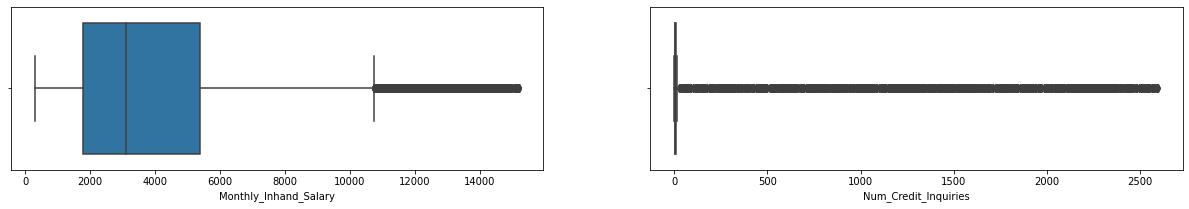

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 3))

sns.boxplot(ax=axes[0], data=df_train, x='Monthly_Inhand_Salary')
sns.boxplot(ax=axes[1], data=df_train, x='Num_Credit_Inquiries')

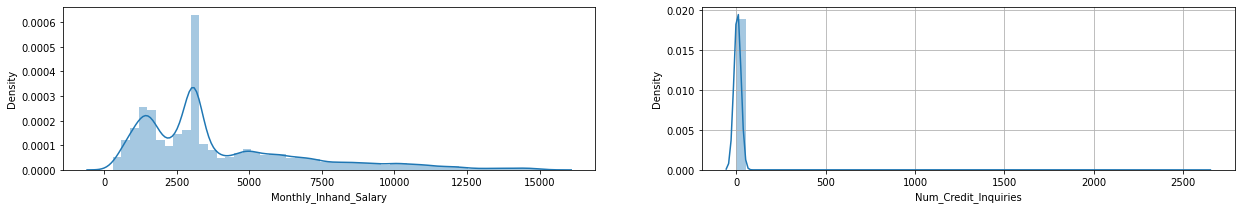

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 3))
plt.grid(True)
sns.distplot(df_train.Monthly_Inhand_Salary, ax=axes[0])
plt.grid(True)
sns.distplot(df_train.Num_Credit_Inquiries, ax=axes[1])

plt.show()

In [ ]:
df_train[df_train['Num_Bank_Accounts']<0]['Num_Bank_Accounts'].unique()

array([-1])

In [ ]:
df_train[df_train['Num_Bank_Accounts']<0].Num_Bank_Accounts.count()

21

In [86]:
df_train.drop(df_train[df_train["Num_Bank_Accounts"]==-1].index,inplace=True)

df_test.drop(df_test[df_test["Num_Bank_Accounts"]==-1].index,inplace=True)

Obs: Identificamos que los valores negativos son -1 y son solo 21 filas por lo cual obtamos por borrarlas

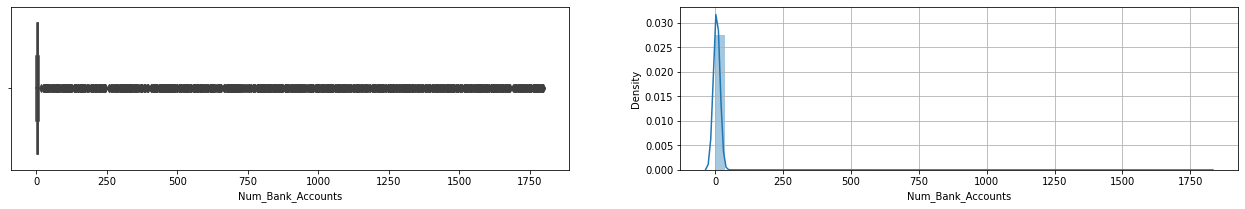

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 3))

sns.boxplot(ax=axes[0], data=df_train, x='Num_Bank_Accounts')

plt.grid(True)
sns.distplot(df_train.Num_Bank_Accounts, ax=axes[1])

plt.show()

In [ ]:
df_train[df_train['Delay_from_due_date']<0]['Delay_from_due_date'].unique()

array([-1, -2, -3, -5, -4])

In [ ]:
df_train[df_train['Delay_from_due_date']<0]['Delay_from_due_date'].count()

591

In [87]:
df_train['Delay_from_due_date'] = np.where(df_train['Delay_from_due_date'] < 0, np.nan, df_train['Delay_from_due_date'])
df_train['Delay_from_due_date'] = df_train['Delay_from_due_date'].fillna(df_train['Delay_from_due_date'].median()) # Reemplazando la mediana

df_test['Delay_from_due_date'] = np.where(df_test['Delay_from_due_date'] < 0, np.nan, df_test['Delay_from_due_date'])
df_test['Delay_from_due_date'] = df_test['Delay_from_due_date'].fillna(df_test['Delay_from_due_date'].median()) # Reemplazando la mediana

Obs: Indetificamos que hay 5 numeros negativos en nuestra columna Delay_from_due_date, como la cantidad de datos es de 591, lo que haremos sera volverlos nulos y completarlos con un la mediana

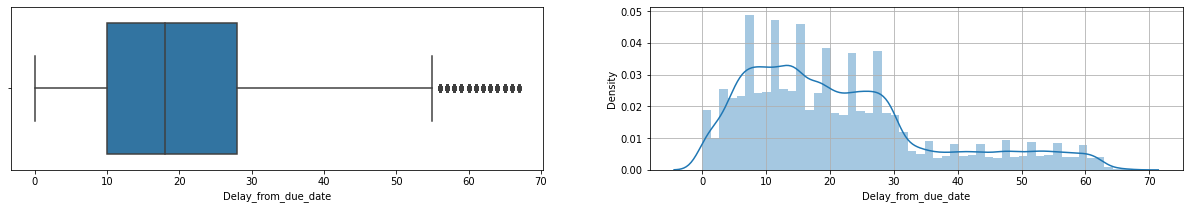

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 3))

sns.boxplot(ax=axes[0], data=df_train, x='Delay_from_due_date')

plt.grid(True)
sns.distplot(df_train.Delay_from_due_date, ax=axes[1])

plt.show()

Obs: Tenemos nuestas columnas cuantitativas "limpias", en los graficos anteriores notamos que la data presenta distintos rangos como tambien outliers. Por lo cual se necesita realizar una estandarizacion en la data o algo similar para poder ajustar estos valores. 

In [88]:
numeric_cols = df_train.select_dtypes(exclude = "object").columns

print(numeric_cols)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


Obs: Guardaremos nuestras columnas cuantitativas/numericas en una variable excluyendo las de tipo Object

In [89]:
def RobustScaling(df, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [90]:
df_train_num_clean = df_train[numeric_cols].copy() # Copiamos las columnas numericas
robust_scaled_train = RobustScaling(df_train_num_clean, numeric_cols) # Aplicamos la funcion para escalar la data train

df_test_num_clean = df_test[numeric_cols].copy()
robust_scaled_test = RobustScaling(df_test_num_clean, numeric_cols)

robust_scaled_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.647059,-0.346247,-0.354489,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.202600,-0.333333,-0.258111,-0.649310,0.413043,-0.150416,-0.311826,-0.123187
1,-0.647059,-0.346247,0.000000,-0.75,-0.333333,-0.833333,0.25,0.000000,0.000000,0.202600,-0.333333,-0.258111,-0.042681,-0.123188,-0.150416,-0.099122,-0.264812
2,27.411765,-0.346247,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.000000,-0.333333,-0.258111,-0.437711,0.427536,-0.150416,-0.304612,-0.028063
3,-0.647059,-0.346247,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.722222,-1.111111,-0.339112,-0.333333,-0.258111,-0.109841,0.434783,-0.150416,0.356889,-0.575751
4,-0.647059,-0.346247,-0.354489,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,0.202600,-0.333333,-0.258111,-0.889159,0.442029,-0.150416,-0.530878,0.024183


Obs: Obtamos por usar este metodo RobustScaler por que es bueno para data que presenta valores atipicos

In [91]:
df_train.drop(labels=numeric_cols, axis="columns", inplace=True) # Borramos las columnas numericas que teniamos en nuestro df
df_train[numeric_cols] = robust_scaled_train[numeric_cols] # Agregamos las columnas con los valores escalados

df_test.drop(labels=numeric_cols, axis="columns", inplace=True) # Borramos las columnas numericas que teniamos en nuestro df
df_test[numeric_cols] = robust_scaled_test[numeric_cols] # Agregamos las columnas con los valores escalados

In [ ]:
df_train.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,Scientist,_,No,High_spent_Small_value_payments,Good,-0.647059,-0.346218,-0.354511,-0.75,-0.333333,...,-0.833333,-0.777778,0.202600,-0.333333,-0.25793,-0.649246,0.413043,-0.150359,-0.311897,-0.123194
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,-0.647059,-0.346218,0.000000,-0.75,-0.333333,...,0.000000,0.000000,0.202600,-0.333333,-0.25793,-0.042624,-0.123188,-0.150359,-0.099145,-0.264828
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good,27.411765,-0.346218,0.000000,-0.75,-0.333333,...,-0.833333,-0.777778,0.000000,-0.333333,-0.25793,-0.437649,0.427536,-0.150359,-0.304681,-0.028064
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,-0.647059,-0.346218,0.000000,-0.75,-0.333333,...,-0.722222,-1.111111,-0.339112,-0.333333,-0.25793,-0.109783,0.434783,-0.150359,0.356970,-0.575787
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,-0.647059,-0.346218,-0.354511,-0.75,-0.333333,...,-0.666667,0.000000,0.202600,-0.333333,-0.25793,-0.889092,0.442029,-0.150359,-0.531000,0.024184


# Variables Cualitativas

In [ ]:
df_train['Occupation'].value_counts(ascending=False)

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
df_train['Credit_Mix'].value_counts(ascending=False)

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
df_train['Payment_of_Min_Amount'].value_counts(ascending=False)

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
df_train['Payment_Behaviour'].value_counts(ascending=False)

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [ ]:
df_train['Credit_Score'].value_counts(ascending=False)

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Obs: <br>
Occupation, Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour: NECESITA TRATAMIENTO y MANTENER FORMATO <br><br>

In [92]:
df_train['Occupation'] = df_train['Occupation'].replace('_______', np.nan)
df_train['Occupation'] = df_train['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer',
       'Entrepreneur', 'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager', 'Accountant',
       'Musician', 'Mechanic', 'Writer', 'Architect'])))

df_test['Occupation'] = df_test['Occupation'].replace('_______', np.nan)
df_test['Occupation'] = df_test['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer',
       'Entrepreneur', 'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager', 'Accountant',
       'Musician', 'Mechanic', 'Writer', 'Architect'])))

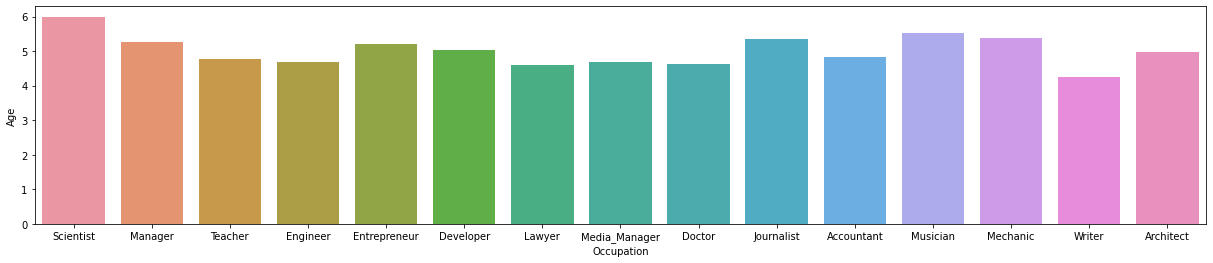

In [ ]:
# Grouped boxplot
plt.figure(figsize=(21,4))
sns.barplot(x='Occupation', y='Age', data=df_train , ci = None)
plt.show()

In [93]:
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace('_', np.nan)
df_train['Credit_Mix'] = df_train['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

df_test['Credit_Mix'] = df_test['Credit_Mix'].replace('_', np.nan)
df_test['Credit_Mix'] = df_test['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

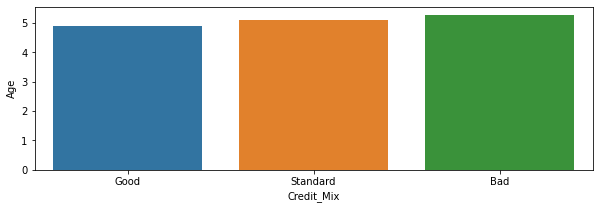

In [ ]:
# Grouped boxplot
plt.figure(figsize=(10,3))
sns.barplot(x='Credit_Mix', y='Age', data=df_train , ci = None)
plt.show()

In [94]:
df_train['Payment_of_Min_Amount'] = df_train['Payment_of_Min_Amount'].replace('NM', np.nan)
df_train['Payment_of_Min_Amount'] = df_train['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

df_test['Payment_of_Min_Amount'] = df_test['Payment_of_Min_Amount'].replace('NM', np.nan)
df_test['Payment_of_Min_Amount'] = df_test['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

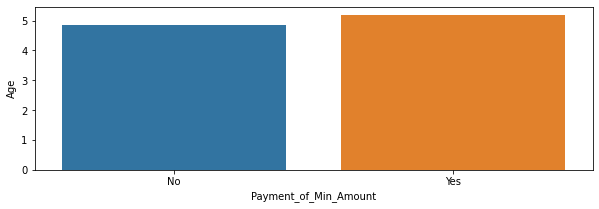

In [ ]:
# Grouped boxplot
plt.figure(figsize=(10,3))
sns.barplot(x='Payment_of_Min_Amount', y='Age', data=df_train , ci = None)
plt.show()

In [95]:
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].replace('!@9#%8', np.nan)
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments', 'Low_spent_Medium_value_payments'])))

df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].replace('!@9#%8', np.nan)
df_test['Payment_Behaviour'] = df_test['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments', 'Low_spent_Medium_value_payments'])))

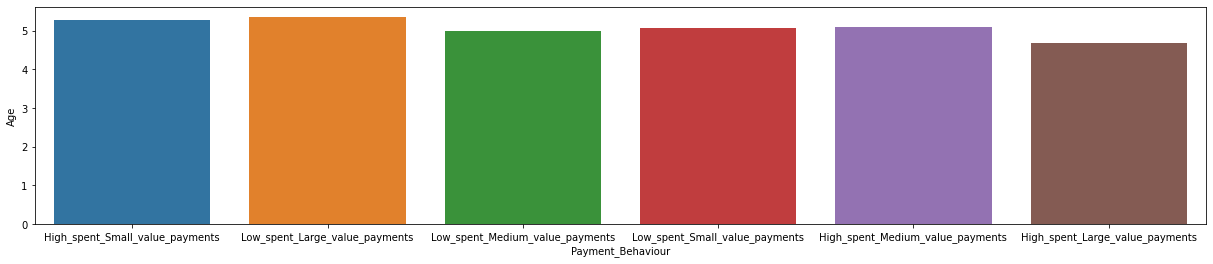

In [ ]:
# Grouped boxplot
plt.figure(figsize=(21,4))
sns.barplot(x='Payment_Behaviour', y='Age', data=df_train , ci = None)
plt.show()

In [ ]:
'''
Occupation				      contiene _______          		            OBJECT  LISTO
Credit_Mix				      contiene _    					                  OBJECT  LISTO 
Payment_of_Min_Amount	  contiene NM     				                  OBJECT  LISTO 
Payment_Behaviour		    contiene !@9#%8  				                  OBJECT  LISTO
'''

Obs: Estas variables categoricas las debemos transformar a un formato numerico, obtamos por recurrir al metodo de Label Encoding

In [96]:
def label_encoding(df):
  for i in df.columns:
      le = preprocessing.LabelEncoder()
      le.fit(list(df[i].dropna()))
      df.loc[~df[i].isnull(),i]=le.transform(df[i].dropna())
      df[i] = df[i].astype(np.int)
  
  return df

In [97]:
df_train_category = df_train[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour']]
df_train_category = label_encoding(df_train_category)

df_test_category = df_test[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour']]
df_test_category = label_encoding(df_test_category)

In [ ]:
df_train_category.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,12,1,0,2
1,12,1,0,3
2,12,1,0,4
3,12,1,0,5
4,12,1,0,1


Obs: Este metodo funciona como un diccionario para darles un identificador a cada variable categoria

In [98]:
df_train_final = df_train.drop(['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'], axis=1)
df_test_final = df_test.drop(['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'], axis=1)

In [99]:
df_train_final[['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']] = df_train_category[['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']]
df_test_final[['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']] = df_test_category[['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']]


In [100]:
df_train_final.head()

,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,Good,-0.647059,-0.346247,-0.354489,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,...,-0.258111,-0.649310,0.413043,-0.150416,-0.311826,-0.123187,12,1,0,2
1,Good,-0.647059,-0.346247,0.000000,-0.75,-0.333333,-0.833333,0.25,0.000000,0.000000,...,-0.258111,-0.042681,-0.123188,-0.150416,-0.099122,-0.264812,12,1,0,3
2,Good,27.411765,-0.346247,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,...,-0.258111,-0.437711,0.427536,-0.150416,-0.304612,-0.028063,12,1,0,4
3,Good,-0.647059,-0.346247,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.722222,-1.111111,...,-0.258111,-0.109841,0.434783,-0.150416,0.356889,-0.575751,12,1,0,5
4,Good,-0.647059,-0.346247,-0.354489,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,...,-0.258111,-0.889159,0.442029,-0.150416,-0.530878,0.024183,12,1,0,1


In [122]:
df_train_final = df_train_final.dropna()

df_test_final = df_test_final.dropna()

## Modelamiento

# Separacion de la data

In [123]:
x = df_train_final.drop(['Credit_Score'] , axis = 1)
y = df_train_final['Credit_Score']

Obs: Dividimos nuestro df de entrenamiento con nuestra data y target

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=200)

In [125]:
X_train.shape, X_test.shape

((79952, 21), (19988, 21))

In [126]:
y_train.shape, y_test.shape

((79952,), (19988,))

In [127]:
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
19657,-0.588235,-0.318065,0.000000,1.00,0.333333,0.166667,0.50,0.666667,0.777778,0.161430,...,0.442068,0.043706,-0.847826,-0.161716,0.000000,-0.198663,2,1,1,5
93492,300.352941,0.817405,1.077329,-1.00,-0.666667,-0.916667,0.00,0.611111,-1.555556,-0.244854,...,0.145398,1.072321,0.369565,0.882598,0.172147,1.305688,8,2,0,1
38681,-0.764706,-0.291760,-0.363949,-1.50,0.000000,-0.416667,0.00,0.611111,-1.222222,-0.049837,...,0.218307,0.128353,0.369565,-0.207701,-0.431698,0.006177,4,2,1,0
29133,-0.941176,-0.536470,-0.691781,0.75,0.333333,0.750000,1.25,1.888889,0.777778,1.010834,...,2.288030,0.543030,-0.623188,-0.226443,-0.656794,-0.424944,7,0,1,5
77392,0.058824,1.782663,2.216747,-1.50,0.000000,-0.083333,-0.50,-0.611111,-0.555556,0.150596,...,0.197956,0.641167,0.268116,-0.081263,0.508231,3.715883,7,1,0,1


# Modelo Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn .metrics import accuracy_score

In [129]:
modeloRF = RandomForestClassifier() # Creamos el modelo

In [130]:
modeloRF.fit(X_train, y_train) # Entrenamos nuestro modelo

RandomForestClassifier()

In [134]:
y_train_pred = modeloRF.predict(X_train)
y_test_pred = modeloRF.predict(X_test)

# Evaluacion del Modelo

In [137]:
confusion_matrix(y_test, y_test_pred)

array([[2368,   66, 1192],
       [ 238, 3200, 2350],
       [ 905, 1279, 8390]])

In [146]:
evaluacion = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evaluacion[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))

    actual = y_test
    
    predicted = model.predict(X_test)
    
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
   
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 69.83189913948368


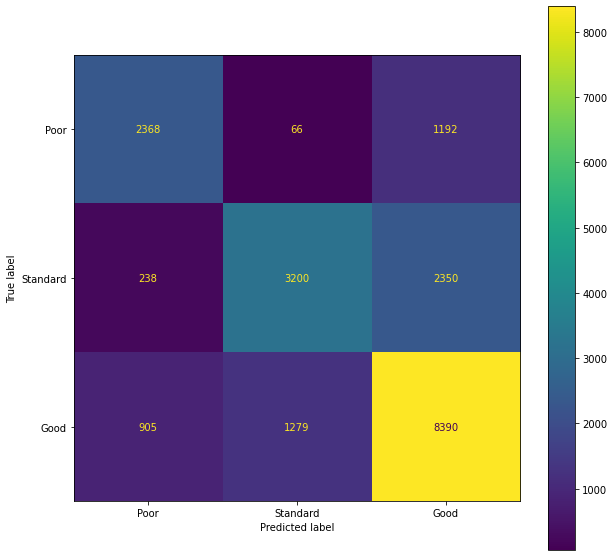

In [147]:
evaluate_classification(modeloRF, "RandomForestClassifier", X_train, X_test, y_train, y_test)

In [139]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        Good       0.67      0.65      0.66      3626
        Poor       0.70      0.55      0.62      5788
    Standard       0.70      0.79      0.75     10574

    accuracy                           0.70     19988
   macro avg       0.69      0.67      0.68     19988
weighted avg       0.70      0.70      0.69     19988



Alta precisión y alto recall: el modelo de Machine Learning escogido maneja perfectamente esa clase.<br>
Alta precisión y bajo recall: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.<br>
Baja precisión y alto recall: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.<br>
Baja precisión y bajo recall: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.<br>

# Aplicando el modelo

In [131]:
modeloRF_predicciones = modeloRF.predict(df_test_final) # Genaremos las prediccions en base a nuestra data de testeo

In [132]:
modeloRF_predicciones

array(['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good'], dtype=object)